In [1]:
nums = [5,10,15]
length = len(nums)

In [2]:
length

3

In [1]:
nums2 = list([5,10,15])
len(nums2)

3

In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms 

In [4]:
# In
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target # Training labels ('malignant =0', 'benign = 1' )
X = cancer_data.data # 30 attributes
X = preprocessing.scale(X) 

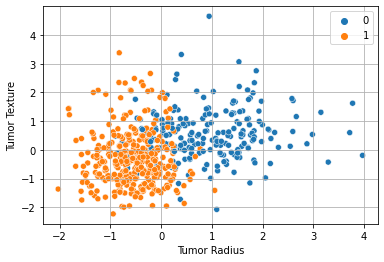

In [7]:
# Plot the first 2 attributes of training points
sns.scatterplot(X[:,0],X[:,1],hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [10]:
# In
alpha = np.arange(1e-15,1,0.005) # Range of hyperparameter values 1E-15 to 1 by 0.005
val_scores = np.zeros((len(alpha),1)) # Initialize validation score for each alpha value

for i in range(len(alpha)): # for each alpha value
    # Set up SVM with hinge loss and 12 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross-validaton
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean()

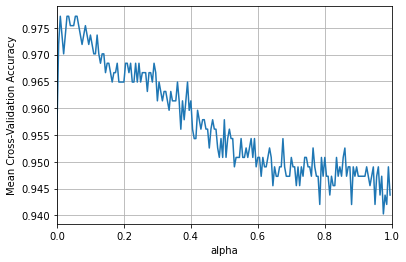

In [11]:
# Plot how cross-validation score changes with alpha
plt.plot(alpha, val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()